# 11.5 Homework- Monte Carlo Integration

In [41]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt 

def f(x):
    return np.sqrt(1-(x-1)**2)

def g(x):
    return -(np.sqrt(4-x**2))+2

def MC(N, showPlot=False):
    a=0
    b=2
    count1=0
    count2=0
    
    x_list = [] # create list for x values
    y_list = [] # create list for y valuess
    for i in range(N):
        xrand= np.random.uniform(a,b) # generate random x value
        yrand= np.random.uniform(a,b) # generate random y value

        x_list.append(xrand)
        y_list.append(yrand)
        
        if yrand<f(xrand):
            count1 +=1
            
        if yrand<g(xrand):
            count2 +=1

    boxarea=4
    integral_1= (count1/N)*boxarea
    integral_2= (count2/N)*boxarea

    area_of_interest= (integral_1-integral_2) #subtract area of g(x) from f(x) to calculate area shaded in green
    

    p= (area_of_interest)/boxarea

    variance= (p*(1-p))/N #calculate variance
    sd= np.sqrt(variance) #calculate standard deviation

    #print ("The area under f(x) is:", integral_1)
    #print ("The area under g(x) is:", integral_2)
    #print ("The area of the space shaded in green is:", area_of_interest) 
    #print("Variance is:", variance)
    #print("Standard Deviation is:", sd)
    
    
          
    ##########################################################################################################
    #                               CODE TO PLOT RANDOM POINTS AND CURVES                                    #     
    ##########################################################################################################
    
    if showPlot == True:
        in_area_x = [] # create list for points inside of function
        in_area_y = [] # create list for points inside of function

        out_area_x = [] # create list for points outside of function
        out_area_y = [] # create list for points outside of function

        for i in range(len(x_list)): # go through each point in the list
            x = x_list[i] # get x value
            y = y_list[i] # get y value

            if y <= f(x) and y >= g(x): # check if point is inside or outside the function
                in_area_x.append(x)
                in_area_y.append(y)
            else:
                out_area_x.append(x)
                out_area_y.append(y)

        x= np.linspace(0,2,100)
        y= f(x)
        y1= g(x)

        in_points= plt.scatter(in_area_x, in_area_y, color="forestgreen")
        out_points= plt.scatter(out_area_x, out_area_y, color="lightsteelblue")
        plt.plot(x,y, color="red", label= "f(x)")
        plt.plot(x,y1, color="black", label= "g(x)")
        plt.legend(loc="upper left")
        plt.axis("square")
        plt.title("Plot of '$N$' random points")

        plt.show()
    
    return (area_of_interest, variance, sd)

def MCaverage(points):
    
    area_of_interest = 0 #initialize variables
    variance = 0
    sd = 0
    N=100 #number of times to repeat MC function

    for i in range(N): #run MC function 100 times 
        showPlot = False
        if i == 0: #show first plot from MC
            showPlot = True
            
        result = MC(points, showPlot=showPlot)
    
        area_of_interest += result[0]
        variance += result[1]
        sd += result[2]

    print ("Average area of space shaded in green is:", area_of_interest/N) #average area
    print ("Average variance is:", variance/N) #average variance
    print ("Average standard deviation is:", sd/N)    #average standard deviation

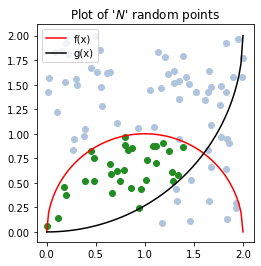

Average area of space shaded in green is: 0.6992000000000003
Average variance is: 0.00141834
Average standard deviation is: 0.03732359225668384


In [42]:
MCaverage(100)

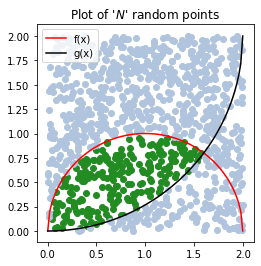

Average area of space shaded in green is: 0.7116400000000003
Average variance is: 0.00014599474999999997
Average standard deviation is: 0.012075104601490845


In [43]:
MCaverage(1000)

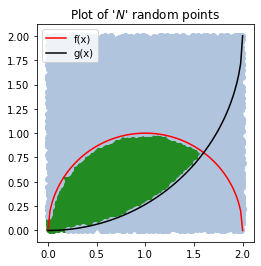

Average area of space shaded in green is: 0.7113519999999997
Average variance is: 1.461809564e-05
Average standard deviation is: 0.0038230806428054664


In [44]:
MCaverage(10000)

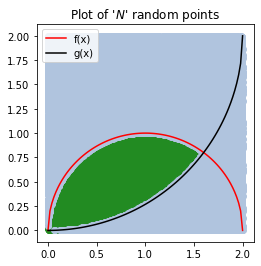

Average area of space shaded in green is: 0.7119712000000001
Average variance is: 1.4630863850199994e-06
Average standard deviation is: 0.0012095731021215458


In [45]:
MCaverage(100000)

# 12.4 Homework- Importance Sampling

In [40]:
from scipy.integrate import quad
from random import random 

def f(x):
    return (x**(-1/2))/(np.exp(x)+1)
def w(x):
    return (x**(-1/2))
def p(x):
    return x**2

def IMC(N):
    const = quad(w, 0, 1)[0]
    I = 0
    for i in range(N):
        x = random()
        y = p(x)
        I += f(y)/w(y)
    return I/N*const

print(IMC(1000000))

0.8389268258828052
